## Binary data

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

from binaryStatistics.base_distribution import BaseDistribution
from binaryStatistics.distributions import Uniform, Thermal, PowerLaw, Sine, VelTilde, PhiAngle
from binaryStatistics.plot_utils import plot_histogram

In [2]:
def power_law(x, C, alpha):
    return C * np.power(x, -alpha)

In [3]:
df = pd.read_csv("../data/WB450.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'SOURCE_ID_PRIMARY', 'ra1', 'dec1', 'mag1', 'MAG1',
       'PARALLAX1', 'parallax_error1', 'DIST1', 'RUWE1', 'PMRA1',
       'PMRA_ERROR1', 'PMDEC1', 'PMDEC_ERROR1', 'BminusR1', 'mass_calc1',
       'mass_flame1', 'mass_flame_upper1', 'mass_flame_lower1', 'age_flame1',
       'age_flame_upper1', 'age_flame_lower1', 'PROB1', 'SOURCE_ID_SECONDARY',
       'ra2', 'dec2', 'mag2', 'MAG2', 'PARALLAX2', 'parallax_error2', 'DIST2',
       'RUWE2', 'PMRA2', 'PMRA_ERROR2', 'PMDEC2', 'PMDEC_ERROR2', 'BminusR2',
       'mass_calc2', 'mass_flame2', 'mass_flame_upper2', 'mass_flame_lower2',
       'age_flame2', 'age_flame_upper2', 'age_flame_lower2', 'PROB2', 'DIST',
       'RA_MEAN', 'DEC_MEAN', 'vRA', 'vRAerr', 'vDEC', 'vDECerr', 'V2D',
       'Log10vRA', 'Log10vDEC', 'Log10r', 'r', 'M'],
      dtype='object')

In [5]:
df["vDECerr"] = df["vDECerr"].apply(lambda x: float(x.split("(")[-1].split(",)")[0]))

In [6]:
df["d_V2D"] = (df["vRA"]/df["V2D"])*df["vRAerr"] + (df["vDEC"]/df["V2D"])*df["vDECerr"]

(0.1, 3)

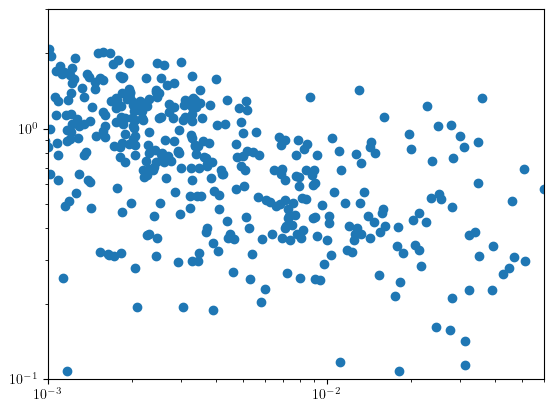

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["r"], df["V2D"])
plt.yscale("log")
plt.xscale("log")
ax.set_xlim(0.001,0.06)
ax.set_ylim(0.1,3)

# V2D synthetic sample

In [12]:
G = 4.3009e-03 # pc·(km/s)²·M_\odot⁻¹

In [13]:
data_length = len(df["r"])

In [14]:
uniform = Uniform()
phi_0 = uniform.random_sample(0,2*np.pi,size=data_length)

In [15]:
thermal = Thermal()
e = thermal.random_sample(0,1,size=data_length)

In [16]:
sine = Sine()
i = sine.random_sample(0,np.pi/2,size=data_length)

In [17]:
phi_angle = PhiAngle(
    dist_parameters={
        "e": e,
    }
)
phi = phi_angle.random_sample(0,2*np.pi,size=data_length)

In [18]:
vel = VelTilde()
v_tilde = vel.distribution(phi, phi_0, i, e)

In [21]:
with open("../data/VTil.dat","r") as file:
    lines = file.readlines()
    
    v = []
    v_dist = []
    for line in lines:
        vel, dist = line.strip().split(" ")
        v.append(float(vel))
        v_dist.append(float(dist))

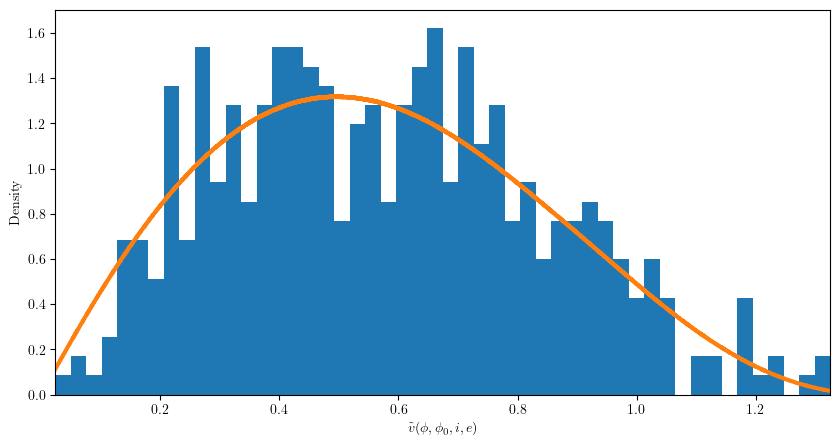

In [23]:
fig, ax = plot_histogram(
    v_tilde,
    bins=50,
    density=True,
    x_params={
        "label":"$\\tilde{v}(\\phi, \\phi_0, i, e)$",
    },
)
ax.plot(v, v_dist, linewidth=3)

In [24]:
term = np.sqrt(G*df["M"]/df["r"])

In [25]:
df["v_2D"] = term*v_tilde + df["d_V2D"]*np.random.uniform(-1,1)

Text(0, 0.5, '2D relative velocity (km/s)')

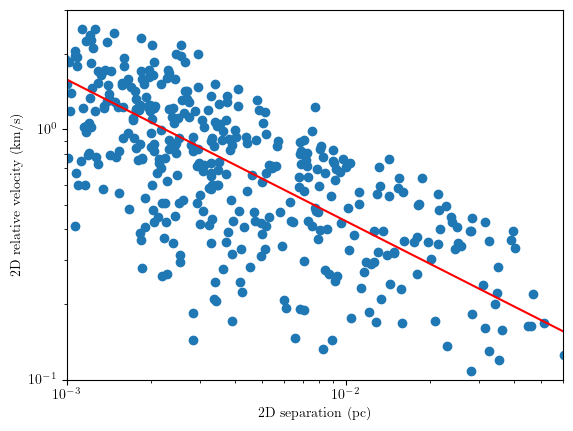

In [26]:
params, params_covariance = curve_fit(power_law, df["r"], df["v_2D"])

C, alpha = params

fig, ax = plt.subplots()
x = np.linspace(0.001, 0.06, 1000)
ax.scatter(df["r"], df["v_2D"])
ax.plot(x, power_law(x, C, alpha), color="red")
plt.xscale("log")
plt.yscale("log")
ax.set_xlim(0.001,0.06)
ax.set_ylim(0.1,3)
ax.set_xlabel("2D separation (pc)")
ax.set_ylabel("2D relative velocity (km/s)")

Text(0, 0.5, '2D relative velocity (km/s)')

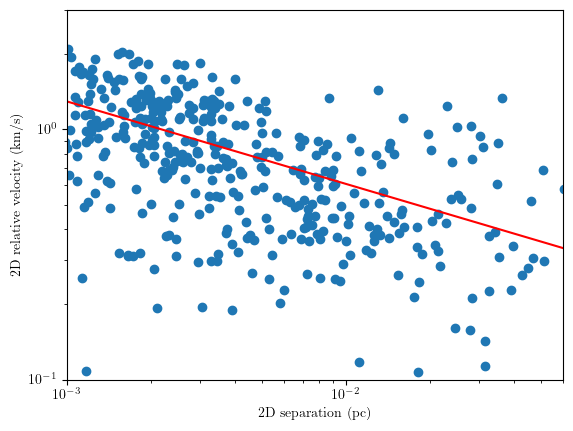

In [27]:
params, params_covariance = curve_fit(power_law, df["r"], df["V2D"])

C, alpha = params

fig, ax = plt.subplots()
x = np.linspace(0.001, 0.06, 1000)
ax.scatter(df["r"], df["V2D"])
ax.plot(x, power_law(x, C, alpha), color="red")
plt.xscale("log")
plt.yscale("log")
ax.set_xlim(0.001,0.06)
ax.set_ylim(0.1,3)
ax.set_xlabel("2D separation (pc)")
ax.set_ylabel("2D relative velocity (km/s)")

$$
dV = \frac{\partial V}{\partial v_x} dv_x + \frac{\partial V}{\partial v_y} dv_y, \\
dV = \frac{v_x}{V} dv_x + \frac{v_y}{V} dv_y
$$